In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sns
from skimage.transform import resize
from skimage.measure import block_reduce
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Flatten, Dropout, Dense, concatenate
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, accuracy_score
from numpy import where
import tensorflow_addons as tfa
from tensorflow.keras import Model, Input

In [2]:
!git clone https://github.com/rininobaron/Kaggle_Melanoma_2020.git

Cloning into 'Kaggle_Melanoma_2020'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [3]:
train=pd.read_csv('./Kaggle_Melanoma_2020/train_sample.csv')
test=pd.read_csv('./Kaggle_Melanoma_2020/test_sample.csv')
test2=pd.read_csv('./Kaggle_Melanoma_2020/test2_sample.csv')

In [4]:
def get_images_to_np(df=pd.read_csv('./Kaggle_Melanoma_2020/test_sample.csv'), submission=False):
    #Parameters
    #df: Pandas DataFrame with the names of images
    #submission:boolea, if True df is equal to pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')
    #
    #Returns
    #X: numpy array with images
    
    if submission:
        df=pd.read_csv('../input/siim-isic-melanoma-classification/test.csv')
        path_root='../input/siim-isic-melanoma-classification/jpeg/test/'
    
    path_root='../input/siim-isic-melanoma-classification/jpeg/train/'
    
    #Reference image to standardize reslution
    img = mpimg.imread(path_root+'ISIC_0015719.jpg')
    shape1=img.shape[0]
    shape2=img.shape[1]
    
    #Our image is very large then we propose reduce the resolution iimage by a factor_reduce
    factor_reduce=25
    X = np.zeros((df['image_name'].count(),int(shape1/factor_reduce),int(shape2/factor_reduce),img.shape[2]))
    
    count=0
    for i in df['image_name']:
        
        print('Processing image in row: '+str(count))
        
        #Getting image
        img = mpimg.imread(path_root+i+'.jpg')
        print(type(np.max(img)))
        
        #sns.distplot(img[:,:,0],kde=False, rug=True)
        #a=plt.hist(img[:,:,2].ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
        #plt.show(a)
        
        #Ensure standardize reslution
        if shape1!=img.shape[0] or shape2!=img.shape[1]:
            img=resize(img,(shape1,shape2))
            #Convert the image to a 0-255 scale.
            img=255*img
            #Convert to integer data type pixels.
            img = img.astype(np.uint8)
        
        #sns.distplot(img[:,:,0],kde=False, rug=True)
        #b=plt.hist(img[:,:,2].ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
        #plt.show(b)
        
        #Force image to uint8
        #img=img_as_ubyte(img)
        
        #Display important values to track function behavior
        print(np.max(img))
        print(type(np.max(img)))
        
        #Display the first four images in train
        if count<=3:
            print('Image name is: '+i)
            temp=plt.imshow(img, vmin=0,vmax=255)
            plt.show(temp)
        
        #But the image is very large yet
        #Therefore we propose to reduce it using from skimage.measure.block_reduce
        #and np.mean
        img = block_reduce(img, block_size=(factor_reduce, factor_reduce, 1), func=np.mean)
        
        #Convert to integer data type pixels.
        img = img.astype(np.uint8)
        
        #Saving img in X array
        
        X[count,:,:,:]=img
        
        #Display the first four images in train
        if count<=3:
            print('Image name reduce by factor '+str(factor_reduce)+' is: '+i)
            temp=plt.imshow(img, vmin=0,vmax=255)
            plt.show(temp)
        
        count+=1
        
        
    return X

Processing image in row: 0
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_1777292


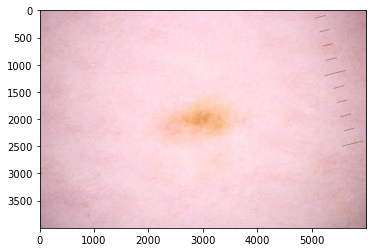

Image name reduce by factor 25 is: ISIC_1777292


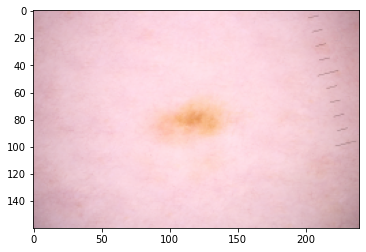

Processing image in row: 1
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_5798331


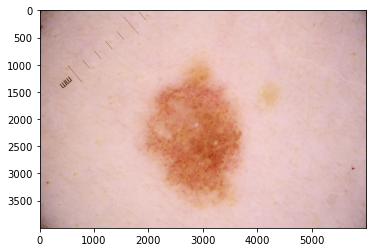

Image name reduce by factor 25 is: ISIC_5798331


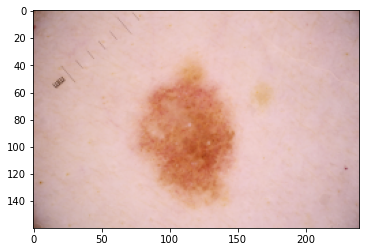

Processing image in row: 2
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_2317042


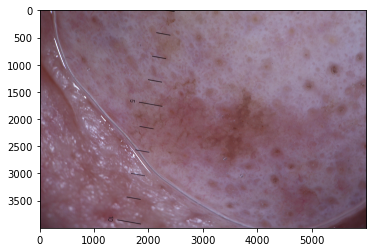

Image name reduce by factor 25 is: ISIC_2317042


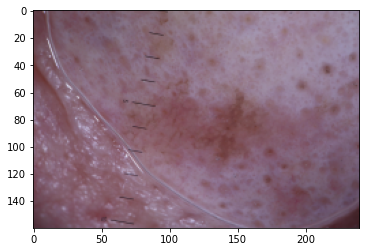

Processing image in row: 3
<class 'numpy.uint8'>
196
<class 'numpy.uint8'>
Image name is: ISIC_4230049


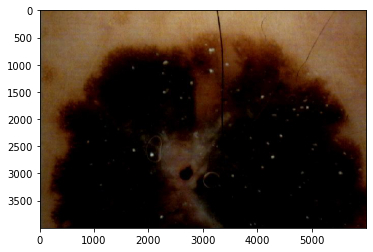

Image name reduce by factor 25 is: ISIC_4230049


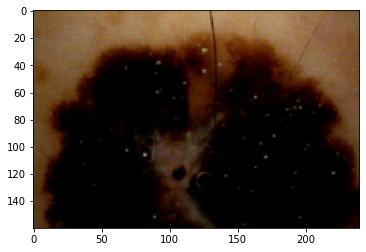

Processing image in row: 4
<class 'numpy.uint8'>
251
<class 'numpy.uint8'>
Processing image in row: 5
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 6
<class 'numpy.uint8'>
230
<class 'numpy.uint8'>
Processing image in row: 7
<class 'numpy.uint8'>
212
<class 'numpy.uint8'>
Processing image in row: 8
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 9
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 10
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 11
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 12
<class 'numpy.uint8'>
204
<class 'numpy.uint8'>
Processing image in row: 13
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 14
<class 'numpy.uint8'>
254
<class 'numpy.uint8'>
Processing image in row: 15
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 16
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image i

Processing image in row: 112
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 113
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 114
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 115
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 116
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 117
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 118
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 119
<class 'numpy.uint8'>
220
<class 'numpy.uint8'>
Processing image in row: 120
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 121
<class 'numpy.uint8'>
211
<class 'numpy.uint8'>
Processing image in row: 122
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 123
<class 'numpy.uint8'>
205
<class 'numpy.uint8'>
Processing image in row: 124
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>

In [5]:
X_test=get_images_to_np(df=test, submission=False)

In [6]:
X_test.shape

(153, 160, 240, 3)

Processing image in row: 0
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_1455822


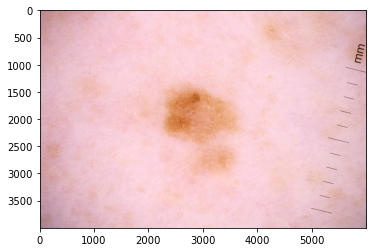

Image name reduce by factor 25 is: ISIC_1455822


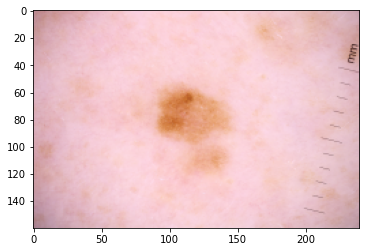

Processing image in row: 1
<class 'numpy.uint8'>
154
<class 'numpy.uint8'>
Image name is: ISIC_8142027


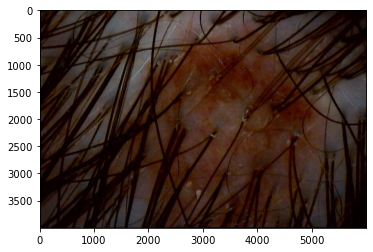

Image name reduce by factor 25 is: ISIC_8142027


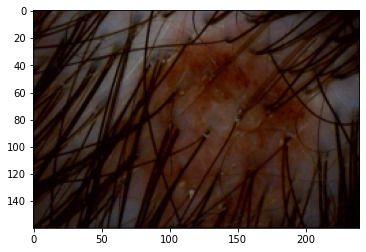

Processing image in row: 2
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_4856299


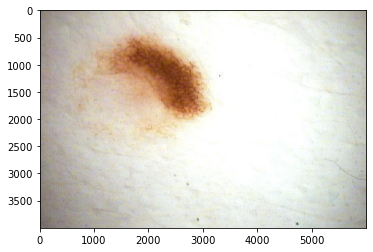

Image name reduce by factor 25 is: ISIC_4856299


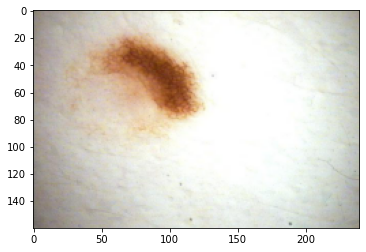

Processing image in row: 3
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Image name is: ISIC_8307332


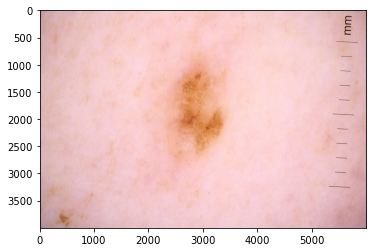

Image name reduce by factor 25 is: ISIC_8307332


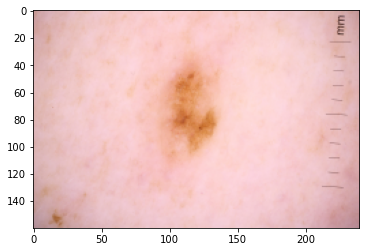

Processing image in row: 4
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 5
<class 'numpy.uint8'>
209
<class 'numpy.uint8'>
Processing image in row: 6
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 7
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 8
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 9
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 10
<class 'numpy.uint8'>
254
<class 'numpy.uint8'>
Processing image in row: 11
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 12
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 13
<class 'numpy.uint8'>
233
<class 'numpy.uint8'>
Processing image in row: 14
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 15
<class 'numpy.uint8'>
233
<class 'numpy.uint8'>
Processing image in row: 16
<class 'numpy.uint8'>
242
<class 'numpy.uint8'>
Processing image i

Processing image in row: 112
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 113
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 114
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 115
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 116
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 117
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 118
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 119
<class 'numpy.uint8'>
249
<class 'numpy.uint8'>
Processing image in row: 120
<class 'numpy.uint8'>
245
<class 'numpy.uint8'>
Processing image in row: 121
<class 'numpy.uint8'>
250
<class 'numpy.uint8'>
Processing image in row: 122
<class 'numpy.uint8'>
217
<class 'numpy.uint8'>
Processing image in row: 123
<class 'numpy.uint8'>
246
<class 'numpy.uint8'>
Processing image in row: 124
<class 'numpy.uint8'>
233
<class 'numpy.uint8'>

243
<class 'numpy.uint8'>
Processing image in row: 219
<class 'numpy.uint8'>
229
<class 'numpy.uint8'>
Processing image in row: 220
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 221
<class 'numpy.uint8'>
248
<class 'numpy.uint8'>
Processing image in row: 222
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 223
<class 'numpy.uint8'>
249
<class 'numpy.uint8'>
Processing image in row: 224
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 225
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 226
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 227
<class 'numpy.uint8'>
231
<class 'numpy.uint8'>
Processing image in row: 228
<class 'numpy.uint8'>
249
<class 'numpy.uint8'>
Processing image in row: 229
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 230
<class 'numpy.uint8'>
234
<class 'numpy.uint8'>
Processing image in row: 231
<class 'numpy.uint8'>

251
<class 'numpy.uint8'>
Processing image in row: 326
<class 'numpy.uint8'>
241
<class 'numpy.uint8'>
Processing image in row: 327
<class 'numpy.uint8'>
254
<class 'numpy.uint8'>
Processing image in row: 328
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 329
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 330
<class 'numpy.uint8'>
233
<class 'numpy.uint8'>
Processing image in row: 331
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 332
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 333
<class 'numpy.uint8'>
201
<class 'numpy.uint8'>
Processing image in row: 334
<class 'numpy.uint8'>
244
<class 'numpy.uint8'>
Processing image in row: 335
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 336
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 337
<class 'numpy.uint8'>
255
<class 'numpy.uint8'>
Processing image in row: 338
<class 'numpy.uint8'>

In [7]:
X_train=get_images_to_np(df=train, submission=False)

In [9]:
X_train.shape

(412, 160, 240, 3)

# Setting true outputs

In [10]:
Y_train=train['target'].to_numpy()
Y_test=test['target'].to_numpy()

# Setting weights per class to try to fix unbalanced class problem

In [21]:
w_p=np.sum(Y_train==0)/Y_train.shape[0]
w_n=np.sum(Y_train==1)/Y_train.shape[0]

In [12]:
#Creating dictionary
class_weights = { 0 : w_n , 1 : w_p }

# Defining Important parameters for training

In [22]:
# parameters
EPOCHS = 500
INIT_LR = 1e-4
BS = 16 #X_train.shape[0]
CLASSES = 1 #Very important number
#norm_size = 28

opt=tf.keras.optimizers.Nadam(lr=INIT_LR, decay=INIT_LR / EPOCHS, clipvalue=5) #Setting clipvalue to avoid exploding gradientes
#opt=tfa.optimizers.LAMB(learning_rate=INIT_LR, decay= INIT_LR / EPOCHS,clipvalue=5)

# start to train model
print('start to train model')

#Setting Metrics
METRICS = [
  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
  tf.keras.metrics.Precision(name='precision'),
  tf.keras.metrics.Recall(name='recall'),
  tf.keras.metrics.AUC(name='AUC')
]

start to train model


# Setting Model

In [23]:
rnet = InceptionV3(weights='imagenet', include_top=False ,input_shape=[X_train.shape[1],X_train.shape[2],X_train.shape[3]])    
rnet.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 240, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 79, 119, 32)  864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 79, 119, 32)  96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 79, 119, 32)  0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

In [24]:
new_model = tf.keras.Sequential([rnet])
new_model.add(tf.keras.layers.GlobalAveragePooling2D())
new_model.add(Dropout(0.8)) #In order to avoid overfitting
#To avoid overfitting kernel regularizer was setting with two parameters
new_model.add(Dense(units=CLASSES, activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=0.1)))

# Final Model Architecture

In [25]:
print("FINAL MODEL TO TRAINING AND TESTING")
new_model.summary()

FINAL MODEL TO TRAINING AND TESTING
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 3, 6, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________


# Compiling Model

In [26]:
new_model.compile(
    optimizer=opt,
    loss = 'binary_crossentropy',
    metrics=METRICS
)

# Use Data Augmentation

In [27]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                             height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                             horizontal_flip=True, fill_mode="nearest")

# Training Model

In [28]:
history_1 = new_model.fit(aug.flow(X_train, Y_train, batch_size=BS),
                            steps_per_epoch=len(X_train) // BS, validation_data=aug.flow(X_test, Y_test),
                            epochs=EPOCHS, verbose=2, class_weight=class_weights)

Epoch 1/500
25/25 - 8s - loss: 0.4773 - accuracy: 0.5707 - precision: 0.2346 - recall: 0.4524 - AUC: 0.5226 - val_loss: 1.0969 - val_accuracy: 0.7386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.5579
Epoch 2/500
25/25 - 6s - loss: 0.4056 - accuracy: 0.6439 - precision: 0.3408 - recall: 0.7262 - AUC: 0.7221 - val_loss: 1.3395 - val_accuracy: 0.7386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.4556
Epoch 3/500
25/25 - 6s - loss: 0.3988 - accuracy: 0.6490 - precision: 0.3514 - recall: 0.7738 - AUC: 0.7526 - val_loss: 1.7511 - val_accuracy: 0.7386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.4154
Epoch 4/500
25/25 - 6s - loss: 0.3543 - accuracy: 0.7172 - precision: 0.4061 - recall: 0.8272 - AUC: 0.8306 - val_loss: 1.8701 - val_accuracy: 0.7386 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.4982
Epoch 5/500
25/25 - 6s - loss: 0.3456 - accuracy: 0.7121 - precision: 0.4085 - recall: 0.7976 - AUC: 0.8339 - val_lo

Epoch 40/500
25/25 - 5s - loss: 0.0650 - accuracy: 0.9874 - precision: 0.9425 - recall: 1.0000 - AUC: 0.9997 - val_loss: 0.7665 - val_accuracy: 0.7320 - val_precision: 0.4878 - val_recall: 0.5000 - val_AUC: 0.7332
Epoch 41/500
25/25 - 6s - loss: 0.0623 - accuracy: 0.9975 - precision: 1.0000 - recall: 0.9884 - AUC: 1.0000 - val_loss: 0.7187 - val_accuracy: 0.7320 - val_precision: 0.4889 - val_recall: 0.5500 - val_AUC: 0.7906
Epoch 42/500
25/25 - 5s - loss: 0.0585 - accuracy: 0.9949 - precision: 0.9770 - recall: 1.0000 - AUC: 0.9998 - val_loss: 0.7147 - val_accuracy: 0.7255 - val_precision: 0.4783 - val_recall: 0.5500 - val_AUC: 0.8062
Epoch 43/500
25/25 - 7s - loss: 0.0666 - accuracy: 0.9722 - precision: 0.8925 - recall: 0.9881 - AUC: 0.9980 - val_loss: 0.7347 - val_accuracy: 0.7516 - val_precision: 0.5227 - val_recall: 0.5750 - val_AUC: 0.7575
Epoch 44/500
25/25 - 6s - loss: 0.0581 - accuracy: 0.9924 - precision: 0.9647 - recall: 1.0000 - AUC: 0.9991 - val_loss: 0.7153 - val_accuracy: 

Epoch 79/500
25/25 - 6s - loss: 0.0340 - accuracy: 0.9823 - precision: 0.9438 - recall: 0.9767 - AUC: 0.9990 - val_loss: 0.7494 - val_accuracy: 0.7451 - val_precision: 0.5106 - val_recall: 0.6000 - val_AUC: 0.7725
Epoch 80/500
25/25 - 5s - loss: 0.0289 - accuracy: 0.9848 - precision: 0.9326 - recall: 1.0000 - AUC: 0.9994 - val_loss: 0.5816 - val_accuracy: 0.8039 - val_precision: 0.6667 - val_recall: 0.5000 - val_AUC: 0.7886
Epoch 81/500
25/25 - 6s - loss: 0.0291 - accuracy: 0.9899 - precision: 0.9643 - recall: 0.9878 - AUC: 0.9993 - val_loss: 0.8408 - val_accuracy: 0.7320 - val_precision: 0.4828 - val_recall: 0.3500 - val_AUC: 0.6695
Epoch 82/500
25/25 - 6s - loss: 0.0314 - accuracy: 0.9848 - precision: 0.9438 - recall: 0.9882 - AUC: 0.9991 - val_loss: 0.6307 - val_accuracy: 0.7843 - val_precision: 0.5778 - val_recall: 0.6500 - val_AUC: 0.8065
Epoch 83/500
25/25 - 6s - loss: 0.0291 - accuracy: 0.9848 - precision: 0.9451 - recall: 0.9885 - AUC: 0.9997 - val_loss: 0.7903 - val_accuracy: 

Epoch 118/500
25/25 - 6s - loss: 0.0169 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8180 - val_accuracy: 0.7124 - val_precision: 0.4286 - val_recall: 0.3000 - val_AUC: 0.7006
Epoch 119/500
25/25 - 6s - loss: 0.0257 - accuracy: 0.9949 - precision: 0.9881 - recall: 0.9881 - AUC: 0.9990 - val_loss: 0.9058 - val_accuracy: 0.6993 - val_precision: 0.4062 - val_recall: 0.3250 - val_AUC: 0.7192
Epoch 120/500
25/25 - 6s - loss: 0.0219 - accuracy: 0.9924 - precision: 0.9659 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8005 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.3000 - val_AUC: 0.6617
Epoch 121/500
25/25 - 6s - loss: 0.0221 - accuracy: 0.9924 - precision: 0.9767 - recall: 0.9882 - AUC: 0.9998 - val_loss: 0.8405 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.2500 - val_AUC: 0.7072
Epoch 122/500
25/25 - 6s - loss: 0.0269 - accuracy: 0.9848 - precision: 0.9529 - recall: 0.9759 - AUC: 0.9992 - val_loss: 0.7972 - val_accur

Epoch 157/500
25/25 - 6s - loss: 0.0244 - accuracy: 0.9924 - precision: 0.9651 - recall: 1.0000 - AUC: 0.9943 - val_loss: 0.7732 - val_accuracy: 0.7582 - val_precision: 0.5319 - val_recall: 0.6250 - val_AUC: 0.7787
Epoch 158/500
25/25 - 6s - loss: 0.0247 - accuracy: 0.9874 - precision: 0.9551 - recall: 0.9884 - AUC: 0.9984 - val_loss: 0.6972 - val_accuracy: 0.7778 - val_precision: 0.5652 - val_recall: 0.6500 - val_AUC: 0.8091
Epoch 159/500
25/25 - 6s - loss: 0.0216 - accuracy: 0.9899 - precision: 0.9647 - recall: 0.9880 - AUC: 0.9997 - val_loss: 0.8483 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.3250 - val_AUC: 0.7110
Epoch 160/500
25/25 - 6s - loss: 0.0222 - accuracy: 0.9949 - precision: 0.9882 - recall: 0.9882 - AUC: 0.9994 - val_loss: 0.8075 - val_accuracy: 0.7516 - val_precision: 0.5417 - val_recall: 0.3250 - val_AUC: 0.7513
Epoch 161/500
25/25 - 7s - loss: 0.0210 - accuracy: 0.9924 - precision: 0.9659 - recall: 1.0000 - AUC: 0.9975 - val_loss: 0.8921 - val_accur

Epoch 196/500
25/25 - 5s - loss: 0.0262 - accuracy: 0.9899 - precision: 0.9556 - recall: 1.0000 - AUC: 0.9953 - val_loss: 0.7141 - val_accuracy: 0.7712 - val_precision: 0.5714 - val_recall: 0.5000 - val_AUC: 0.7834
Epoch 197/500
25/25 - 6s - loss: 0.0237 - accuracy: 0.9848 - precision: 0.9318 - recall: 1.0000 - AUC: 0.9981 - val_loss: 0.8627 - val_accuracy: 0.7190 - val_precision: 0.4211 - val_recall: 0.2000 - val_AUC: 0.7319
Epoch 198/500
25/25 - 6s - loss: 0.0180 - accuracy: 0.9949 - precision: 0.9882 - recall: 0.9882 - AUC: 0.9999 - val_loss: 1.0123 - val_accuracy: 0.6993 - val_precision: 0.3500 - val_recall: 0.1750 - val_AUC: 0.7018
Epoch 199/500
25/25 - 6s - loss: 0.0179 - accuracy: 0.9949 - precision: 0.9767 - recall: 1.0000 - AUC: 0.9997 - val_loss: 0.7547 - val_accuracy: 0.7778 - val_precision: 0.6364 - val_recall: 0.3500 - val_AUC: 0.7522
Epoch 200/500
25/25 - 6s - loss: 0.0419 - accuracy: 0.9672 - precision: 0.8913 - recall: 0.9647 - AUC: 0.9930 - val_loss: 1.0919 - val_accur

Epoch 235/500
25/25 - 6s - loss: 0.0200 - accuracy: 0.9949 - precision: 0.9878 - recall: 0.9878 - AUC: 0.9992 - val_loss: 0.9231 - val_accuracy: 0.7516 - val_precision: 0.5333 - val_recall: 0.4000 - val_AUC: 0.7415
Epoch 236/500
25/25 - 6s - loss: 0.0165 - accuracy: 0.9924 - precision: 0.9655 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7840 - val_accuracy: 0.7908 - val_precision: 0.6176 - val_recall: 0.5250 - val_AUC: 0.7704
Epoch 237/500
25/25 - 6s - loss: 0.0141 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.9040 - val_accuracy: 0.7516 - val_precision: 0.5263 - val_recall: 0.5000 - val_AUC: 0.7753
Epoch 238/500
25/25 - 6s - loss: 0.0122 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7605 - val_accuracy: 0.7908 - val_precision: 0.6053 - val_recall: 0.5750 - val_AUC: 0.7979
Epoch 239/500
25/25 - 6s - loss: 0.0137 - accuracy: 0.9975 - precision: 0.9885 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.6757 - val_accur

Epoch 274/500
25/25 - 6s - loss: 0.0151 - accuracy: 0.9975 - precision: 0.9884 - recall: 1.0000 - AUC: 0.9996 - val_loss: 0.6837 - val_accuracy: 0.7778 - val_precision: 0.6154 - val_recall: 0.4000 - val_AUC: 0.7577
Epoch 275/500
25/25 - 6s - loss: 0.0135 - accuracy: 0.9975 - precision: 0.9880 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7380 - val_accuracy: 0.7778 - val_precision: 0.6000 - val_recall: 0.4500 - val_AUC: 0.7435
Epoch 276/500
25/25 - 6s - loss: 0.0122 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7026 - val_accuracy: 0.7908 - val_precision: 0.6538 - val_recall: 0.4250 - val_AUC: 0.7944
Epoch 277/500
25/25 - 6s - loss: 0.0162 - accuracy: 0.9949 - precision: 0.9770 - recall: 1.0000 - AUC: 0.9995 - val_loss: 0.7486 - val_accuracy: 0.7843 - val_precision: 0.6207 - val_recall: 0.4500 - val_AUC: 0.7860
Epoch 278/500
25/25 - 6s - loss: 0.0115 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8190 - val_accur

Epoch 313/500
25/25 - 6s - loss: 0.0194 - accuracy: 0.9924 - precision: 0.9765 - recall: 0.9881 - AUC: 0.9996 - val_loss: 0.8649 - val_accuracy: 0.7320 - val_precision: 0.4762 - val_recall: 0.2500 - val_AUC: 0.7067
Epoch 314/500
25/25 - 5s - loss: 0.0128 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8443 - val_accuracy: 0.7778 - val_precision: 0.6154 - val_recall: 0.4000 - val_AUC: 0.7086
Epoch 315/500
25/25 - 6s - loss: 0.0135 - accuracy: 0.9975 - precision: 0.9884 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.9074 - val_accuracy: 0.7320 - val_precision: 0.4848 - val_recall: 0.4000 - val_AUC: 0.6736
Epoch 316/500
25/25 - 6s - loss: 0.0116 - accuracy: 0.9975 - precision: 0.9882 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7766 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.4000 - val_AUC: 0.7572
Epoch 317/500
25/25 - 7s - loss: 0.0119 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8309 - val_accur

Epoch 352/500
25/25 - 6s - loss: 0.0307 - accuracy: 0.9823 - precision: 0.9341 - recall: 0.9884 - AUC: 0.9945 - val_loss: 0.6839 - val_accuracy: 0.8039 - val_precision: 0.6316 - val_recall: 0.6000 - val_AUC: 0.8021
Epoch 353/500
25/25 - 6s - loss: 0.0185 - accuracy: 0.9899 - precision: 0.9651 - recall: 0.9881 - AUC: 0.9997 - val_loss: 1.1300 - val_accuracy: 0.7255 - val_precision: 0.4783 - val_recall: 0.5500 - val_AUC: 0.7777
Epoch 354/500
25/25 - 6s - loss: 0.0387 - accuracy: 0.9798 - precision: 0.9333 - recall: 0.9767 - AUC: 0.9885 - val_loss: 0.8913 - val_accuracy: 0.7451 - val_precision: 0.5152 - val_recall: 0.4250 - val_AUC: 0.7352
Epoch 355/500
25/25 - 6s - loss: 0.0227 - accuracy: 0.9874 - precision: 0.9432 - recall: 1.0000 - AUC: 0.9970 - val_loss: 0.8133 - val_accuracy: 0.7451 - val_precision: 0.5135 - val_recall: 0.4750 - val_AUC: 0.7686
Epoch 356/500
25/25 - 7s - loss: 0.0176 - accuracy: 0.9975 - precision: 0.9882 - recall: 1.0000 - AUC: 0.9974 - val_loss: 0.7975 - val_accur

Epoch 391/500
25/25 - 6s - loss: 0.0098 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8393 - val_accuracy: 0.7451 - val_precision: 0.5161 - val_recall: 0.4000 - val_AUC: 0.7618
Epoch 392/500
25/25 - 6s - loss: 0.0102 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8748 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.2750 - val_AUC: 0.7116
Epoch 393/500
25/25 - 6s - loss: 0.0098 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8917 - val_accuracy: 0.7255 - val_precision: 0.4615 - val_recall: 0.3000 - val_AUC: 0.7671
Epoch 394/500
25/25 - 6s - loss: 0.0101 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7813 - val_accuracy: 0.7908 - val_precision: 0.6667 - val_recall: 0.4000 - val_AUC: 0.7125
Epoch 395/500
25/25 - 6s - loss: 0.0100 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8475 - val_accur

Epoch 430/500
25/25 - 6s - loss: 0.0300 - accuracy: 0.9773 - precision: 0.9022 - recall: 1.0000 - AUC: 0.9933 - val_loss: 0.8555 - val_accuracy: 0.7386 - val_precision: 0.5000 - val_recall: 0.2750 - val_AUC: 0.6821
Epoch 431/500
25/25 - 6s - loss: 0.0141 - accuracy: 0.9975 - precision: 0.9884 - recall: 1.0000 - AUC: 0.9999 - val_loss: 0.8413 - val_accuracy: 0.7712 - val_precision: 0.5676 - val_recall: 0.5250 - val_AUC: 0.7618
Epoch 432/500
25/25 - 6s - loss: 0.0109 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.9074 - val_accuracy: 0.7516 - val_precision: 0.5250 - val_recall: 0.5250 - val_AUC: 0.7506
Epoch 433/500
25/25 - 6s - loss: 0.0145 - accuracy: 0.9924 - precision: 0.9759 - recall: 0.9878 - AUC: 0.9999 - val_loss: 1.0680 - val_accuracy: 0.7320 - val_precision: 0.4884 - val_recall: 0.5250 - val_AUC: 0.7850
Epoch 434/500
25/25 - 7s - loss: 0.0211 - accuracy: 0.9924 - precision: 0.9773 - recall: 0.9885 - AUC: 0.9980 - val_loss: 0.9206 - val_accur

Epoch 469/500
25/25 - 6s - loss: 0.0104 - accuracy: 0.9975 - precision: 0.9880 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7895 - val_accuracy: 0.7582 - val_precision: 0.5600 - val_recall: 0.3500 - val_AUC: 0.7067
Epoch 470/500
25/25 - 6s - loss: 0.0188 - accuracy: 0.9975 - precision: 1.0000 - recall: 0.9880 - AUC: 0.9908 - val_loss: 0.7406 - val_accuracy: 0.7908 - val_precision: 0.6333 - val_recall: 0.4750 - val_AUC: 0.7775
Epoch 471/500
25/25 - 6s - loss: 0.0098 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7596 - val_accuracy: 0.7974 - val_precision: 0.6452 - val_recall: 0.5000 - val_AUC: 0.7789
Epoch 472/500
25/25 - 6s - loss: 0.0099 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.8132 - val_accuracy: 0.7647 - val_precision: 0.5588 - val_recall: 0.4750 - val_AUC: 0.7574
Epoch 473/500
25/25 - 6s - loss: 0.0096 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - AUC: 1.0000 - val_loss: 0.7189 - val_accur

# Setting important function to visualize metrics

In [29]:
#Setting function to display confusion matrix
def display_confusion_matrix(cmat, score, precision, recall):   ###1
    plt.figure(figsize=(15,15))
    ax = plt.gca()
    ax.matshow(cmat, cmap='Reds')
    ax.set_xticks(range(CLASSES+1))
    ax.set_xticklabels(["0","1"], fontdict={'fontsize': 34})
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    ax.set_yticks(range(CLASSES+1))
    ax.set_yticklabels(["0","1"], fontdict={'fontsize': 34})
    plt.setp(ax.get_yticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    titlestring = ""
    if score is not None:
        titlestring += 'f1 = {:.3f} '.format(score)
    if precision is not None:
        titlestring += '\nprecision = {:.3f} '.format(precision)
    if recall is not None:
        titlestring += '\nrecall = {:.3f} '.format(recall)
    if len(titlestring) > 0:
        ax.text(1.25, -0.25, titlestring, fontdict={'fontsize': 22, 'horizontalalignment':'right', 'verticalalignment':'top', 'color':'#000000'})
    plt.title("Confusion Matrix", fontdict={'fontsize': 34})
    plt.savefig('Matriz_de_Confusion.png')
    plt.show()
    

#Setting function to display training curves
def display_training_curves(training, validation, title, subplot):   ####2
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])
    plt.savefig(str(title)+'.png')

#Setting function to display ROC curve
def plot_roc(name, labels, predictions):
    fp, tp, _ = roc_curve(labels, predictions)
    auc1 = auc(fp, tp)
    lw=2

    plt.plot(100*fp, 100*tp, linewidth=2, lw=lw, color='darkorange', label='ROC curve (area = %0.2f)' % auc1)
    plt.plot([0, 100], [0, 100], color='navy', lw=lw, linestyle='--',label='Random')
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-5,105])
    plt.ylim([-5,105])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.savefig('ROC.png')


# Plotting Validation Metrics


y_test_pred_labeled:
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]

Prediction probabilities: [[0.00468648]
 [0.00614438]
 [0.98589176]
 [0.9830966 ]
 [0.98577   ]
 [0.00791284]
 [0.01313223]
 [0.01197645]
 [0.56356543]
 [0.00579712]
 [0.01384315]
 [0.00787615]
 [0.00965426]
 [0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


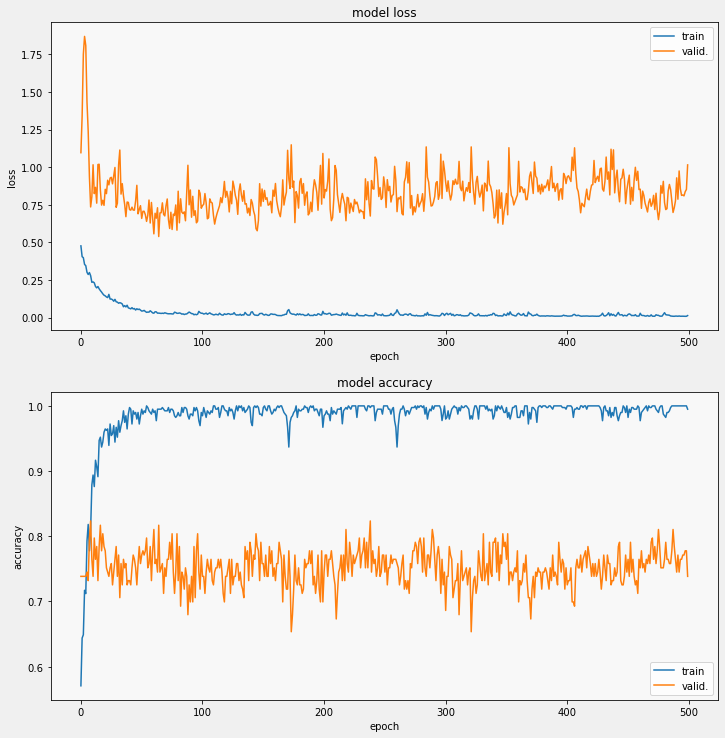

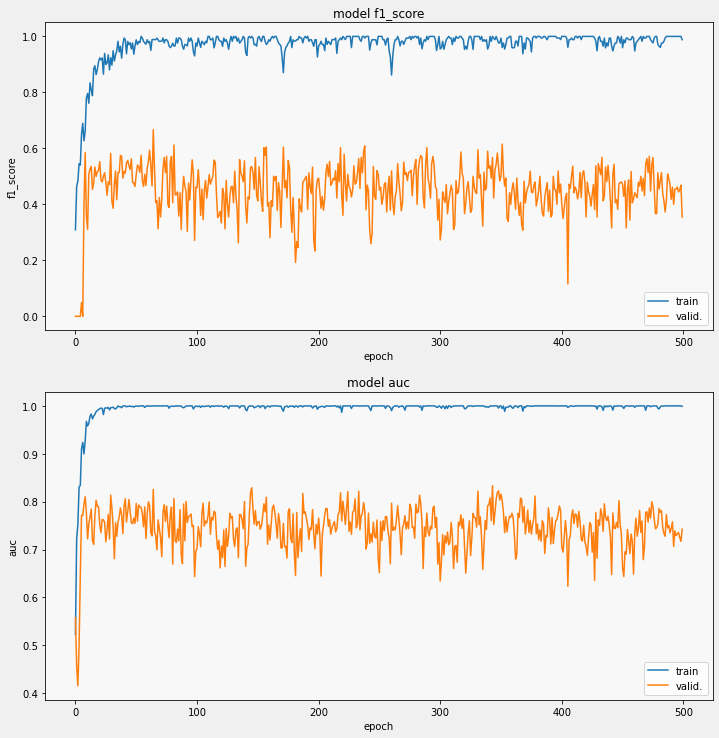

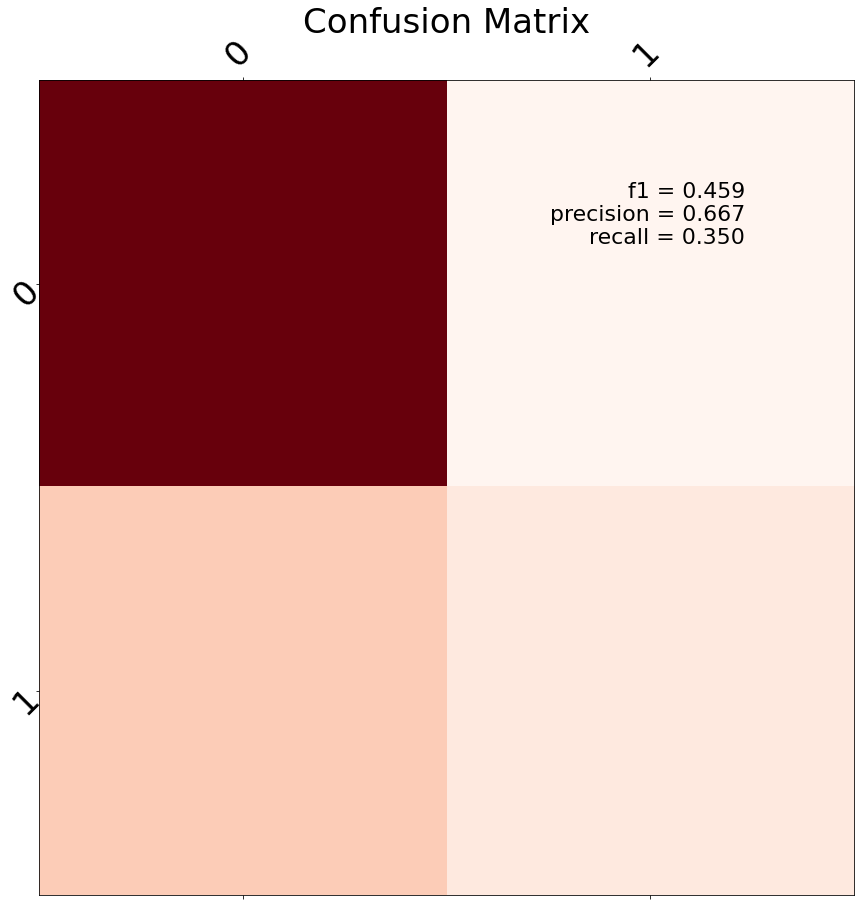

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.




MAXIMUM METRICS

train_acc:
0.9949495196342468

test_acc:
0.8169934749603271

precision:
0.6363636255264282

recall
0.699999988079071

f1_score
0.666666655313401

AUC
0.8255529999732971


AVERAGE METRICS

train_acc:
0.9855376770496368

test_acc:
0.7522875964641571

precision:
0.5359170686006546

recall
0.4044999987073243

f1_score
0.45234536111397544

AUC
0.7458236724734306



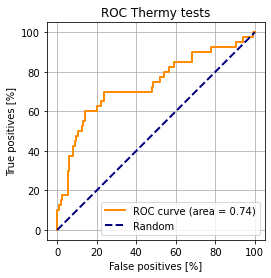

In [30]:
#Setting class predict vectors
y_train_pred_labeled=(new_model.predict(X_train) > 0.5).astype("int32")
y_test_pred_labeled=(new_model.predict(X_test) > 0.5).astype("int32")
print()
print('y_test_pred_labeled:')
print(y_test_pred_labeled)
print()

#Setting validation metrics
print('Prediction probabilities: '+str(new_model.predict(X_test)))
print()
print()
#METRICS FROM FINAL WEIGHTS MODEL
cmat = confusion_matrix(Y_test, y_test_pred_labeled)
score = f1_score(Y_test, y_test_pred_labeled)
precision = precision_score(Y_test, y_test_pred_labeled)
recall = recall_score(Y_test, y_test_pred_labeled)

#Display training curves (loss & accuracy)
display_training_curves(history_1.history['loss'], history_1.history['val_loss'], 'loss', 211)
display_training_curves(history_1.history['accuracy'], history_1.history['val_accuracy'], 'accuracy', 212)

#Display training curves (loss & accuracy)
precision_history1=np.array(history_1.history['precision'])
precision_history2=np.array(history_1.history['val_precision'])

recall_history1=np.array(history_1.history['recall'])
recall_history2=np.array(history_1.history['val_recall'])

f1_history_train= 2*(precision_history1*recall_history1)/(precision_history1+recall_history1)
f1_history_train[where(np.isnan(f1_history_train) == True)] = 0
f1_history_test=2*(precision_history2*recall_history2)/(precision_history2+recall_history2)
f1_history_test[where(np.isnan(f1_history_test) == True)] = 0

display_training_curves(f1_history_train, f1_history_test, 'f1_score', 211)
display_training_curves(history_1.history['AUC'], history_1.history['val_AUC'], 'auc', 212)

#Display confusion matrix
display_confusion_matrix(cmat, score, precision, recall)   ####2

#Display ROC
plot_roc('ROC Thermy tests', Y_test, new_model.predict(X_test))

#Getting max indez from f1_score 
index=where(f1_history_test==np.max(f1_history_test))
index=index[0][0]

#MAXIMUM metrics
print()
print()
print("MAXIMUM METRICS")
print()
print("train_acc:")
print(history_1.history['accuracy'][index])
print()
print("test_acc:")
print(history_1.history['val_accuracy'][index])
print()
print("precision:")
print(history_1.history['val_precision'][index])
print()
print("recall")
print(history_1.history['val_recall'][index])
print()
print("f1_score")
print(f1_history_test[index])
print()
print("AUC")
print(history_1.history['val_AUC'][index])
print()


#AVERAGE METRICS
print()
print("AVERAGE METRICS")
print()
print("train_acc:")
print(np.sum(history_1.history['accuracy'])/len(history_1.history['accuracy']))
print()
print("test_acc:")
print(np.sum(history_1.history['val_accuracy'])/len(history_1.history['val_accuracy']))
print()
print("precision:")
print(np.sum(history_1.history['val_precision'])/len(history_1.history['val_precision']))
print()
print("recall")
print(np.sum(history_1.history['val_recall'])/len(history_1.history['val_recall']))
print()
print("f1_score")
print(np.sum(f1_history_test)/len(f1_history_test))
print()
print("AUC")
print(np.sum(history_1.history['val_AUC'])/len(history_1.history['val_AUC']))
print()


In [ ]:
print("hola")